### imports

In [ ]:
%%capture
!pip install pyod

In [ ]:
%%capture
!pip install hapiclient --upgrade
!pip install hapiplot --upgrade

In [ ]:
%%capture
!pip install matplotlib==3.5.1

In [ ]:
import datetime

In [ ]:
from hapiclient import hapi
from hapiplot import hapiplot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
matplotlib.__version__

'3.2.2'

## 1. Extracción dataset AC_H1_MFI

In [ ]:
server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'AC_H1_MFI'
start      = '2010-06-01T00:00:00'
stop       = '2014-06-01T00:00:00'
parameters = 'Magnitude'
opts       = {'logging': True}

hapi(): Running hapi.py version 0.2.5
hapi(): file directory = /tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi
hapi(): Reading /tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


hapi(): Writing AC_H1_MFI___.json 
hapi(): Writing AC_H1_MFI___.pkl 
hapi(): Reading https://cdaweb.gsfc.nasa.gov/hapi/capabilities


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


hapi(): Writing https://cdaweb.gsfc.nasa.gov/hapi/data?id=AC_H1_MFI&parameters=Magnitude&time.min=2010-06-01T00:00:00Z&time.max=2014-06-01T00:00:00Z&format=binary to AC_H1_MFI_Magnitude_20100601T000000_20140601T000000.bin


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


hapi(): Reading and parsing AC_H1_MFI_Magnitude_20100601T000000_20140601T000000.bin
hapi(): Writing /tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H1_MFI_Magnitude_20100601T000000_20140601T000000.pkl
hapi(): Writing /tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H1_MFI_Magnitude_20100601T000000_20140601T000000.npy
{'HAPI': '2.0', 'status': {'code': 1200, 'message': 'OK'}, 'parameters': [{'name': 'Time', 'type': 'isotime', 'units': 'UTC', 'length': 24, 'fill': None}, {'name': 'Magnitude', 'type': 'double', 'units': 'nT', 'fill': '-1.0E31', 'description': 'B-field magnitude'}], 'startDate': '1997-09-02T00:00:00Z', 'stopDate': '2022-07-11T23:56:00Z', 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H1_MFI', 'contact': 'N. Ness @ Bartol Research Institute', 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi', 'x_dataset': 'AC_H1_MFI', 'x_parameters': 'Magnitude', 'x_time.min': '2010-06-01T00:00:00Z', 'x_time.max': '2014-06-01T00:00:00Z', 'x_requestDate': '2022-08-21T13:48:47', 'x_cac

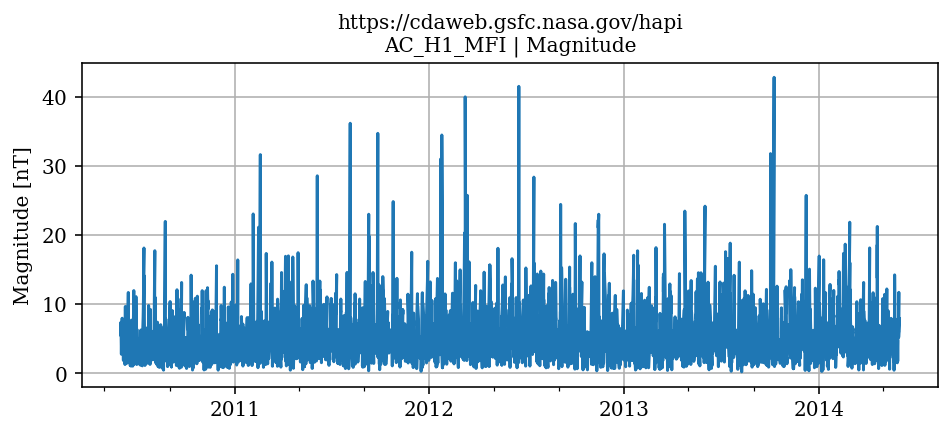

{'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'length': 24,
   'fill': None},
  {'name': 'Magnitude',
   'type': 'double',
   'units': 'nT',
   'fill': '-1.0E31',
   'description': 'B-field magnitude',
   'hapiplot': {'figure': <Figure size 1008x432 with 1 Axes>}}],
 'startDate': '1997-09-02T00:00:00Z',
 'stopDate': '2022-07-11T23:56:00Z',
 'resourceURL': 'https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_H1_MFI',
 'contact': 'N. Ness @ Bartol Research Institute',
 'x_server': 'https://cdaweb.gsfc.nasa.gov/hapi',
 'x_dataset': 'AC_H1_MFI',
 'x_parameters': 'Magnitude',
 'x_time.min': '2010-06-01T00:00:00Z',
 'x_time.max': '2014-06-01T00:00:00Z',
 'x_requestDate': '2022-08-21T13:48:47',
 'x_cacheDir': '/tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi',
 'x_downloadTime': 31.665266752243042,
 'x_readTime': 0.01756572723388672,
 'x_metaFileParsed': '/tmp/hapi-data/cdaweb.gsfc.nasa.gov_hapi/AC_H1_MFI___.pkl',

In [ ]:
data, meta = hapi(server, dataset, parameters, start, stop, **opts)
print(meta)
print(data)

# Plot all parameters
from hapiplot import hapiplot
hapiplot(data, meta)

In [ ]:
type(data)

numpy.ndarray

In [ ]:
data.shape

(525960,)

In [ ]:
data[0]

(b'2010-06-01T00:00:00.000Z', 5.55900002)

In [ ]:
data[-1]

(b'2014-05-31T23:56:00.000Z', 7.87099981)

In [ ]:
type(data[0][0])

numpy.bytes_

In [ ]:
type(data[0][1])

numpy.float64

## 2. Preparación de los datos

In [ ]:
dates = []
magnitudes = []
for tupl in data:
  date = tupl[0].decode('UTF-8')
  dates.append(date)
  magnitudes.append(tupl[1])

dates_array = np.array(dates)
magnitudes_array = np.array(magnitudes)
data_array = np.concatenate((np.expand_dims(dates_array, axis=1), np.expand_dims(magnitudes_array, axis=1)), axis = 1)

df_datetime = pd.DataFrame(data_array, columns=['Fecha', 'Magnitud'])
df_datetime['Fecha'] = df_datetime['Fecha'].apply(lambda x : pd.to_datetime(x, format = "%Y-%m-%dT%H:%M:%S.000Z"))
df_datetime['Magnitud'] = df_datetime['Magnitud'].astype(float)
display(df_datetime)

,Fecha,Magnitud
0,2010-06-01 00:00:00,5.559
1,2010-06-01 00:04:00,5.653
2,2010-06-01 00:08:00,5.680
3,2010-06-01 00:12:00,5.677
4,2010-06-01 00:16:00,5.654
...,...,...
525955,2014-05-31 23:40:00,8.171
525956,2014-05-31 23:44:00,8.104
525957,2014-05-31 23:48:00,8.095
525958,2014-05-31 23:52:00,7.931


In [ ]:
base_date = df_datetime['Fecha'].iloc[0]
df = df_datetime.copy()
df['Minutos'] = df_datetime['Fecha'].apply(lambda x: int((x - base_date).total_seconds()/60))

In [ ]:
fill_value = df['Magnitud'].mean()

In [ ]:
values = {"Magnitud": fill_value}
df.fillna(value=values, inplace = True)

In [ ]:
df.describe()

,Magnitud,Minutos
count,525960.000000,5.259600e+05
mean,5.299360,1.051918e+06
std,2.729095,6.073269e+05
min,0.201000,0.000000e+00
25%,3.622000,5.259590e+05
50%,4.638000,1.051918e+06
75%,6.238000,1.577877e+06
max,42.792999,2.103836e+06


In [ ]:
path_AC_H1_MFI = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI.xlsx'

In [ ]:
df.to_excel(path_AC_H1_MFI, index = False)

### read df

In [ ]:
path_AC_H1_MFI = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI.xlsx'

In [ ]:
df = pd.read_excel(path_AC_H1_MFI)

In [ ]:
df.shape

(540720, 3)

In [ ]:
df.head()

,Fecha,Magnitud,Minutos
0,2018-06-01 00:00:00,10.124,0
1,2018-06-01 00:04:00,9.597,4
2,2018-06-01 00:08:00,9.818,8
3,2018-06-01 00:12:00,9.659,12
4,2018-06-01 00:16:00,9.402,16


### train_test_split

In [ ]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
X_train

,Fecha,Magnitud,Minutos
0,2018-06-01 00:00:00,10.124,0
1,2018-06-01 00:04:00,9.597,4
2,2018-06-01 00:08:00,9.818,8
3,2018-06-01 00:12:00,9.659,12
4,2018-06-01 00:16:00,9.402,16
...,...,...,...
432571,2021-09-14 14:04:00,5.011,1730284
432572,2021-09-14 14:08:00,5.211,1730288
432573,2021-09-14 14:12:00,5.156,1730292
432574,2021-09-14 14:16:00,5.142,1730296


In [ ]:
path_AC_H1_MFI_train = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI_train.xlsx'
X_train.to_excel(path_AC_H1_MFI_train, index = False)

In [ ]:
X_test

,Fecha,Magnitud,Minutos
432576,2021-09-14 14:24:00,5.069,1730304
432577,2021-09-14 14:28:00,5.088,1730308
432578,2021-09-14 14:32:00,5.118,1730312
432579,2021-09-14 14:36:00,5.071,1730316
432580,2021-09-14 14:40:00,5.025,1730320
...,...,...,...
540715,2022-07-11 23:40:00,10.000,2162860
540716,2022-07-11 23:44:00,9.816,2162864
540717,2022-07-11 23:48:00,9.576,2162868
540718,2022-07-11 23:52:00,9.566,2162872


In [ ]:
path_AC_H1_MFI_test = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI_test.xlsx'
X_test.to_excel(path_AC_H1_MFI_test, index = False)

In [ ]:
df_prueba = pd.read_excel(path_AC_H1_MFI_test)
test_prueba_data = df_prueba['Magnitud']
test_prueba_data.shape

(108144,)

## 3. Resultados de los modelos

In [ ]:
path_AC_H1_MFI_train = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI_train.xlsx'
path_AC_H1_MFI_test = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI_test.xlsx'
X_train = pd.read_excel(path_AC_H1_MFI_train)
X_test = pd.read_excel(path_AC_H1_MFI_test)
display(X_train.shape)
display(X_test.shape)

(432576, 3)

(108144, 3)

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Datos de training', fontsize = 20)
plt.xlabel('Tiempo (fecha)', fontsize = 20)
plt.ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)
plt.scatter(X_train['Fecha'], X_train['Magnitud'], s = 0.1)
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Datos de test', fontsize = 20)
plt.xlabel('Tiempo (fecha)', fontsize = 20)
plt.ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)
plt.scatter(X_test['Fecha'], X_test['Magnitud'], s = 0.1)
plt.show()

#### OOL sigma

In [ ]:
X_test

,Fecha,Magnitud,Minutos
0,2021-09-14 14:24:00,5.069,1730304
1,2021-09-14 14:28:00,5.088,1730308
2,2021-09-14 14:32:00,5.118,1730312
3,2021-09-14 14:36:00,5.071,1730316
4,2021-09-14 14:40:00,5.025,1730320
...,...,...,...
108139,2022-07-11 23:40:00,10.000,2162860
108140,2022-07-11 23:44:00,9.816,2162864
108141,2022-07-11 23:48:00,9.576,2162868
108142,2022-07-11 23:52:00,9.566,2162872


In [ ]:
def assign_outlier_label(df_column, bot_soft_limit, top_soft_limit, bot_hard_limit, top_hard_limit):
  store = np.zeros(len(df_column))
  for position, value in enumerate(df_column):
    if value < bot_hard_limit:
      store[position] = -2
    elif value < bot_soft_limit:
      store[position] = -1
    elif value > top_hard_limit:
      store[position] = 2
    elif value > top_soft_limit:
      store[position] = 1

  return store

In [ ]:
media = X_train['Magnitud'].mean()
sigma = X_train['Magnitud'].std()
q1 = X_train['Magnitud'].quantile(0.25)
q3 = X_train['Magnitud'].quantile(0.75)
iqr = q3 - q1
print(f'{media} +- {sigma}')
top_soft_limit = media + 2*sigma
bot_soft_limit = media - 2*sigma
top_hard_limit = media + 3*sigma
bot_hard_limit = media - 3*sigma

top_soft_limit2 = q3 + 1.5*iqr
bot_soft_limit2 = q1 - 1.5*iqr
top_hard_limit2 = q3 + 3*iqr
bot_hard_limit2 = q1 - 3*iqr

print(q1, iqr)
print(q3, iqr)

print(top_soft_limit2, bot_soft_limit2)
print(top_hard_limit2, bot_hard_limit2)

X_test['OOL_label'] = assign_outlier_label(X_test['Magnitud'], bot_soft_limit, top_soft_limit, bot_hard_limit, top_hard_limit)
X_train['OOL_label'] = assign_outlier_label(X_train['Magnitud'], bot_soft_limit, top_soft_limit, bot_hard_limit, top_hard_limit)

X_test['OOL_label2'] = assign_outlier_label(X_test['Magnitud'], bot_soft_limit2, top_soft_limit2, bot_hard_limit2, top_hard_limit2)
X_train['OOL_label2'] = assign_outlier_label(X_train['Magnitud'], bot_soft_limit2, top_soft_limit2, bot_hard_limit2, top_hard_limit2)

4.607292279711042 +- 2.0360265240992446
3.380000114440918 1.9689998626708984
5.348999977111816 1.9689998626708984
8.302499771118164 0.4265003204345703
11.255999565124512 -2.5269994735717773


In [ ]:
df_limits = pd.DataFrame(index=['bot soft limit', 'top soft limit', 'bot hard limit', 'top hard limit'],
                         data=[bot_soft_limit2, top_soft_limit2, bot_hard_limit2, top_hard_limit2])
np.round(df_limits,4)

,0
bot soft limit,0.4265
top soft limit,8.3025
bot hard limit,-2.5270
top hard limit,11.2560


In [ ]:
X_test[X_test['OOL_label'] == 2][['Magnitud', 'OOL_label']]

,Magnitud,OOL_label
1114,10.886,2.0
1118,10.864,2.0
1119,11.944,2.0
1120,12.085,2.0
1121,12.008,2.0
...,...,...
108121,10.881,2.0
108122,10.832,2.0
108132,10.768,2.0
108135,10.741,2.0


In [ ]:
X_train['OOL_label2'].value_counts()

 0.0    409805
 1.0     16825
 2.0      5910
-1.0        36
Name: OOL_label2, dtype: int64

In [ ]:
outliers = pd.DataFrame(data = [409805, 36, 16825, 0, 5910], index = ['normal', 'anomalías leves inferior', 'anomalías leves superior', 'anomalías graves inferior', 'anomalías graves superior'])
outliers

,0
normal,409805
anomalías leves inferior,36
anomalías leves superior,16825
anomalías graves inferior,0
anomalías graves superior,5910


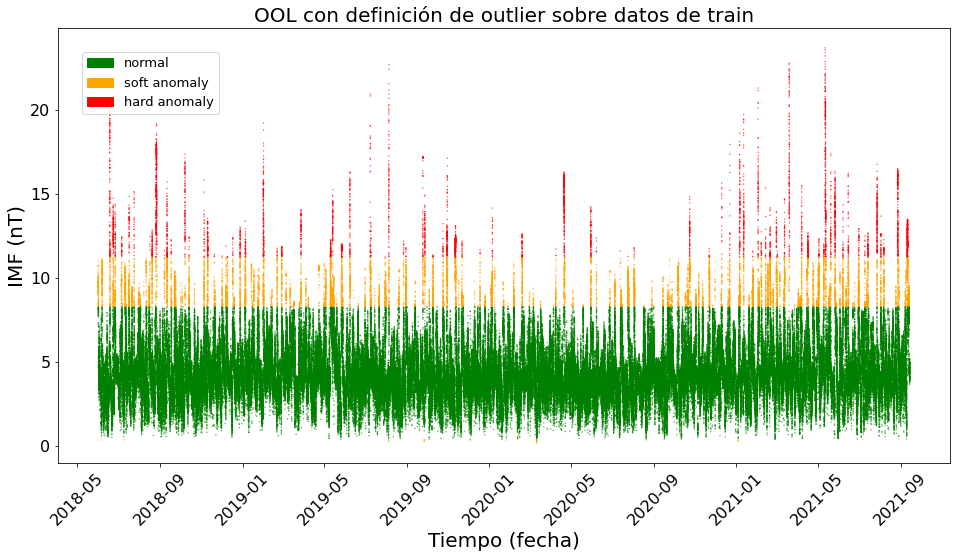

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

colors = ['green']*len(X_train['OOL_label2'])
for index, outlier_label in enumerate(X_train['OOL_label2']):
    if outlier_label == -1 or outlier_label == 1:
        colors[index] = 'orange'
    elif outlier_label == -2 or outlier_label == 2:
        colors[index] = 'red'

ax.set_title('OOL con definición de outlier sobre datos de train', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

#plt.plot(df['Fecha'], df['Magnitud'])
ax.scatter(X_train['Fecha'], X_train['Magnitud'], c=colors, s = 0.1)
legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='orange', label='soft anomaly', radius = 0.5),
                   Circle((0,0), color='red', label='hard anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 13)
plt.show()

In [ ]:
colors.count('red')

5910

In [ ]:
X_train_renamed = X_train.rename(columns={'Magnitud': 'IMF'})

In [ ]:
np.round(X_train_renamed.describe(),4)

,IMF,Minutos,OOL_label,OOL_label2
count,432576.0000,4.325760e+05,432576.0000,432576.0000
mean,4.6073,8.651500e+05,0.0607,0.0661
std,2.0360,4.994963e+05,0.3023,0.2988
min,0.1870,0.000000e+00,-1.0000,-1.0000
25%,3.3800,4.325750e+05,0.0000,0.0000
50%,4.2130,8.651500e+05,0.0000,0.0000
75%,5.3490,1.297725e+06,0.0000,0.0000
max,23.7180,1.730300e+06,2.0000,2.0000


#### OOL 10-20 top

In [ ]:
def assign_outlier_label(df_column, bot_soft_limit, top_soft_limit, bot_hard_limit, top_hard_limit):
  store = np.zeros(len(df_column))
  for position, value in enumerate(df_column):
    if value < bot_hard_limit:
      store[position] = -2
    elif value < bot_soft_limit:
      store[position] = -1
    elif value > top_hard_limit:
      store[position] = 2
    elif value > top_soft_limit:
      store[position] = 1

  return store

In [ ]:
media = X_train['Magnitud'].mean()
sigma = X_train['Magnitud'].std()
top_soft_limit = 10
bot_soft_limit = -1000
top_hard_limit = 20
bot_hard_limit = -1000
print(top_soft_limit, bot_soft_limit)
print(top_hard_limit, bot_hard_limit)
X_test['OOL_label'] = assign_outlier_label(X_test['Magnitud'], bot_soft_limit, top_soft_limit, bot_hard_limit, top_hard_limit)

10 -1000
20 -1000


In [ ]:
X_test[X_test['OOL_label'] == 2][['Magnitud', 'OOL_label']]

,Magnitud,OOL_label
18093,23.290001,2.0
18094,20.507000,2.0
18139,21.228001,2.0
18140,22.882000,2.0
18141,23.580999,2.0
...,...,...
106748,21.010000,2.0
106749,20.848000,2.0
106750,20.754999,2.0
106751,20.638000,2.0


In [ ]:
X_test['OOL_label'].value_counts()

0.0    98890
1.0     8572
2.0      682
Name: OOL_label, dtype: int64

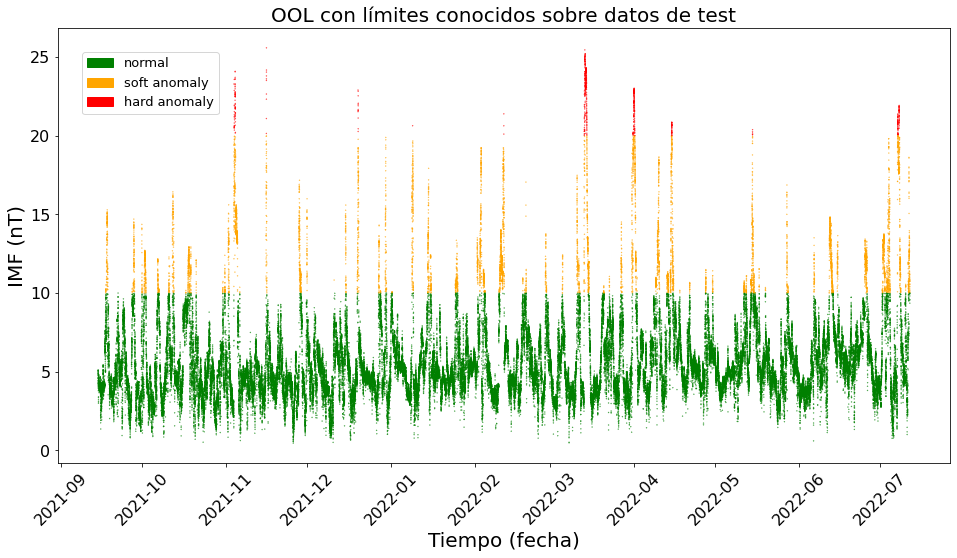

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

colors = ['green']*len(X_test['OOL_label'])
for index, outlier_label in enumerate(X_test['OOL_label']):
    if outlier_label == -1 or outlier_label == 1:
        colors[index] = 'orange'
    elif outlier_label == -2 or outlier_label == 2:
        colors[index] = 'red'

ax.set_title('OOL con límites conocidos sobre datos de test', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

#plt.plot(df['Fecha'], df['Magnitud'])
ax.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = 0.1)
legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='orange', label='soft anomaly', radius = 0.5),
                   Circle((0,0), color='red', label='hard anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 13)
plt.show()

#### ECOD

In [ ]:
from pyod.models.ecod import ECOD
import time

In [ ]:
train_data = X_train[['Magnitud']]
train_data2 = X_train[['Magnitud', 'Minutos']]
test_data = X_test[['Magnitud']]

model = ECOD(contamination = 0.01)

inicio = time.time()
model.fit(train_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

Tiempo de entrenamiento: 0.3110494613647461 segundos


In [ ]:
threshold = model.threshold_
print(threshold)

5.29745317214099


In [ ]:
X_test['ecod score'] = model.decision_function(test_data)

inicio = time.time()
X_test['ecod label'] = model.predict(test_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

Tiempo de entrenamiento: 0.4273383617401123 segundos


In [ ]:
mask = X_test['ecod label'] == 1
X_test2 = X_test[mask]
X_test2[X_test2['Magnitud'] <= 5]

,Fecha,Magnitud,Minutos,VAE label,VAE score,VAE outlier probability,ecod score,ecod label,isolation forest label,isolation forest score
3186,2021-09-23 10:48:00,0.943,1743048,0,1.900829,0.457828,6.317194,1,1,0.003755
4271,2021-09-26 11:08:00,1.194,1747388,0,1.777549,0.379236,5.351723,1,0,-0.033517
4272,2021-09-26 11:12:00,0.890,1747392,0,1.926860,0.477232,6.555566,1,1,0.020039
4273,2021-09-26 11:16:00,0.834,1747396,0,1.954365,0.498664,6.818841,1,1,0.028500
4274,2021-09-26 11:20:00,1.110,1747400,0,1.818806,0.402242,5.634346,1,0,-0.019508
...,...,...,...,...,...,...,...,...,...,...
105998,2022-07-06 00:56:00,0.919,2154296,0,1.912617,0.466349,6.421872,1,1,0.013553
105999,2022-07-06 01:00:00,0.845,2154300,0,1.948962,0.492690,6.745458,1,1,0.028245
106000,2022-07-06 01:04:00,0.945,2154304,0,1.899847,0.456916,6.305987,1,1,0.004117
107794,2022-07-11 00:40:00,1.180,2161480,0,1.784426,0.382806,5.395590,1,0,-0.027687


In [ ]:
X_test['ECOD outlier probability'] = model.predict_proba(test_data)[:,1]

In [ ]:
outliers = X_test[X_test['ecod label'] == 1]
np.mean(outliers['ECOD outlier probability'])

0.46895723453285804

In [ ]:
np.mean(X_test['ECOD outlier probability'])

0.09174964579541127

In [ ]:
X_test

,Fecha,Magnitud,Minutos,ecod score,ecod label
0,2021-09-14 14:24:00,5.069,1730304,1.091734,0
1,2021-09-14 14:28:00,5.088,1730308,1.101713,0
2,2021-09-14 14:32:00,5.118,1730312,1.117119,0
3,2021-09-14 14:36:00,5.071,1730316,1.092831,0
4,2021-09-14 14:40:00,5.025,1730320,1.068629,0
...,...,...,...,...,...
108139,2022-07-11 23:40:00,10.000,2162860,3.319262,0
108140,2022-07-11 23:44:00,9.816,2162864,3.250524,0
108141,2022-07-11 23:48:00,9.576,2162868,3.158582,0
108142,2022-07-11 23:52:00,9.566,2162872,3.155149,0


In [ ]:
X_test.value_counts(subset = 'ecod label')

ecod label
0    106042
1      2102
dtype: int64

In [ ]:
2102/len(X_test)

0.019437046900429057

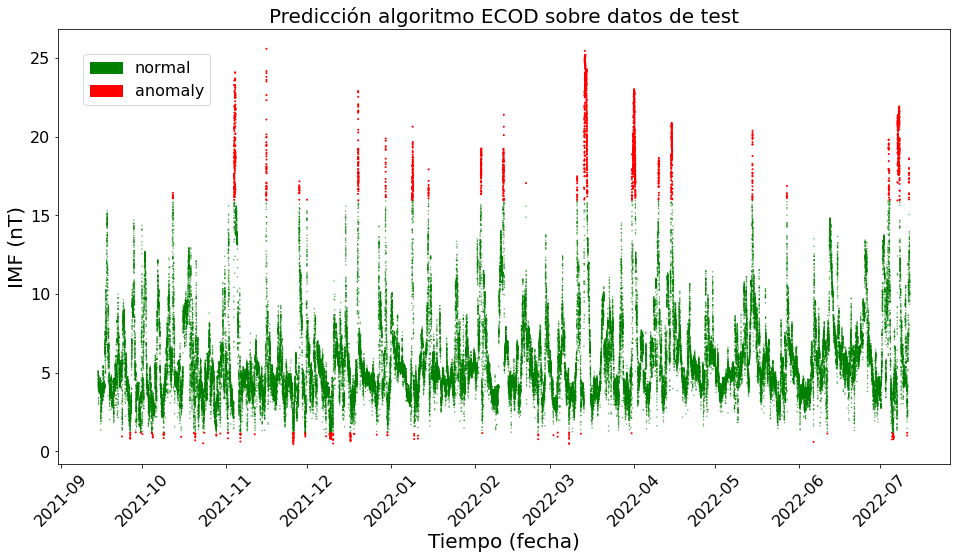

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
colors = ['green']*len(X_test['ecod label'])
sizes = [0.1]*len(X_test['ecod label'])
for index, outlier_value in enumerate(X_test['ecod label']):
    if outlier_value == 1:
        colors[index] = 'red'
        sizes[index] *= 10

ax.set_title('Predicción algoritmo ECOD sobre datos de test', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

ax.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = sizes)

legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='red', label='anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 16)

plt.show()

#### IForest

In [ ]:
from pyod.models.iforest import IForest

In [ ]:
clf = IForest(contamination = 0.01, random_state = 42, n_jobs = 1, bootstrap = False, max_samples = 8192, n_estimators = 300)

inicio = time.time()
clf.fit(train_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

Tiempo de entrenamiento: 142.5553104877472 segundos


In [ ]:
inicio = time.time()
X_test['isolation forest label'] = clf.predict(test_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

X_test['isolation forest score'] = clf.decision_function(test_data)

Tiempo de entrenamiento: 15.35968828201294 segundos


In [ ]:
clf.threshold_

0.0

In [ ]:
mask = X_test['isolation forest label'] == 1
X_test2 = X_test[mask]
X_test2[X_test2['Magnitud'] >= 5]

,Fecha,Magnitud,Minutos,VAE label,VAE score,VAE outlier probability,ecod score,ecod label,isolation forest label,isolation forest score
1130,2021-09-17 17:44:00,13.436,1734824,1,4.235149,0.314572,4.557360,0,1,0.033052
1133,2021-09-17 17:56:00,13.513,1734836,1,4.272968,0.316650,4.582895,0,1,0.035615
1134,2021-09-17 18:00:00,14.488,1734840,1,4.751843,0.339555,4.864266,0,1,0.061059
1135,2021-09-17 18:04:00,14.409,1734844,1,4.713042,0.337608,4.840351,0,1,0.056638
1136,2021-09-17 18:08:00,13.450,1734848,1,4.242025,0.314845,4.560715,0,1,0.034180
...,...,...,...,...,...,...,...,...,...,...
108098,2022-07-11 20:56:00,13.052,2162696,1,4.046547,0.303217,4.417874,0,1,0.018926
108099,2022-07-11 21:00:00,13.478,2162700,1,4.255778,0.315655,4.570671,0,1,0.034068
108100,2022-07-11 21:04:00,13.120,2162704,1,4.079945,0.305163,4.441773,0,1,0.022750
108102,2022-07-11 21:12:00,12.714,2162712,1,3.880537,0.294602,4.312038,0,1,0.006265


In [ ]:
X_test['iforest outlier probability'] = model.predict_proba(test_data)[:,1]

In [ ]:
outliers = X_test[X_test['isolation forest label'] == 1]
np.mean(outliers['iforest outlier probability'])

0.3912404547274711

In [ ]:
np.mean(X_test['iforest outlier probability'])

0.09174964579541127

In [ ]:
X_test

,Fecha,Magnitud,Minutos,isolation forest label,isolation forest score,iforest outlier probability
0,2021-09-14 14:24:00,5.069,1730304,0,-0.162643,0.032458
1,2021-09-14 14:28:00,5.088,1730308,0,-0.162451,0.033271
2,2021-09-14 14:32:00,5.118,1730312,0,-0.156643,0.034525
3,2021-09-14 14:36:00,5.071,1730316,0,-0.162028,0.032548
4,2021-09-14 14:40:00,5.025,1730320,0,-0.159662,0.030578
...,...,...,...,...,...,...
108139,2022-07-11 23:40:00,10.000,2162860,0,-0.049740,0.213786
108140,2022-07-11 23:44:00,9.816,2162864,0,-0.054122,0.208191
108141,2022-07-11 23:48:00,9.576,2162868,0,-0.055991,0.200707
108142,2022-07-11 23:52:00,9.566,2162872,0,-0.055966,0.200427


In [ ]:
X_test.value_counts(subset = 'isolation forest label')

isolation forest label
0    103739
1      4405
dtype: int64

In [ ]:
4405/len(X_test)

0.04073272673472407

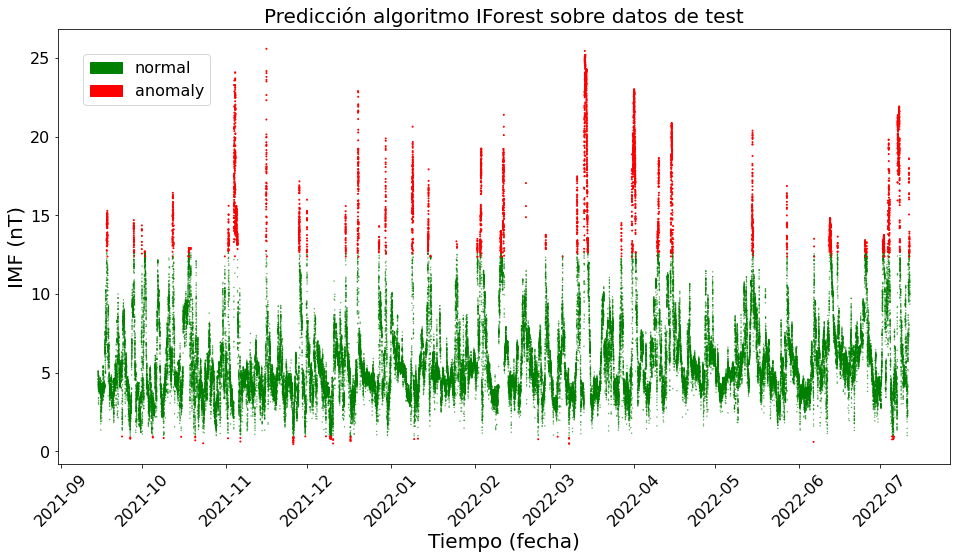

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
colors = ['green']*len(X_test['isolation forest label'])
sizes = [0.1]*len(X_test['isolation forest label'])

for index, outlier_value in enumerate(X_test['isolation forest label']):
    if outlier_value == 1:
        colors[index] = 'red'
        sizes[index] *= 10

ax.set_title('Predicción algoritmo IForest sobre datos de test', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

ax.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = sizes)

legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='red', label='anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 16)
plt.show()

#### VAE

In [ ]:
from pyod.models.vae import VAE
import keras

In [ ]:
vae = VAE(encoder_neurons = [64, 16, 4, 1], decoder_neurons = [1, 4, 16, 64],
          contamination = 0.01, random_state = 42, epochs = 5, preprocessing = True, verbose = 2,
          validation_size = 0.1, latent_dim = 1, dropout_rate = 0, batch_size = 512, l2_regularizer = 0)

inicio = time.time()
vae.fit(train_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 1)            2           ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           128         ['dense[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['dense_1[0][0]']                
                                                                                              

In [ ]:
vae.history["val_loss"]

In [ ]:
vae.history["loss"]

In [ ]:
inicio = time.time()
X_test['VAE label'] = vae.predict(test_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')
X_test['VAE label'] = vae.predict(test_data)
X_test['VAE score'] = vae.decision_function(test_data)

Tiempo de entrenamiento: 10.606924295425415 segundos


In [ ]:
vae.threshold_

3.511803412277477

In [ ]:
mask = X_test['VAE label'] == 1
X_test2 = X_test[mask]
X_test2[X_test2['Magnitud'] <= 10]

In [ ]:
X_test['VAE outlier probability'] = model.predict_proba(test_data)[:,1]

In [ ]:
outliers = X_test[X_test['VAE label'] == 1]
np.mean(outliers['VAE outlier probability'])

0.3711131154002482

In [ ]:
np.mean(X_test['VAE outlier probability'])

0.09174964579541127

In [ ]:
X_test[['VAE label', 'VAE score']].describe()

,VAE label,VAE score
count,108144.000000,108144.000000
mean,0.048177,0.995293
std,0.214140,1.253698
min,0.000000,0.000065
25%,0.000000,0.277436
50%,0.000000,0.599633
75%,0.000000,1.152671
max,1.000000,10.206100


In [ ]:
X_test.value_counts(subset = 'VAE label')

VAE label
0    102934
1      5210
dtype: int64

In [ ]:
5210/len(X_test)

0.04817650540020713

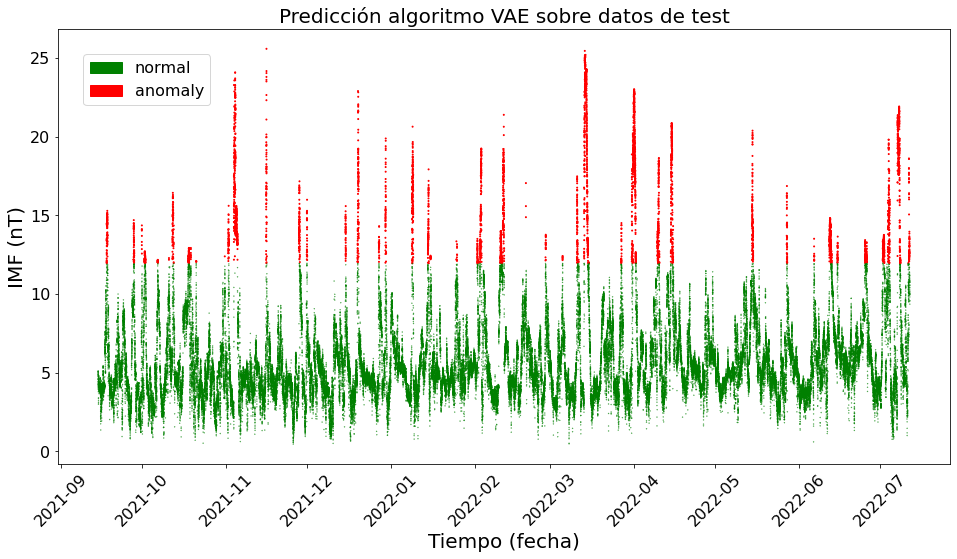

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
colors = ['green']*len(X_test['VAE label'])
sizes = [0.1]*len(X_test['VAE label'])

for index, outlier_value in enumerate(X_test['VAE label']):
    if outlier_value == 1:
        colors[index] = 'red'
        sizes[index] *= 10

ax.set_title('Predicción algoritmo VAE sobre datos de test', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

ax.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = sizes)

legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='red', label='anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 16)
plt.show()

#### LOF

In [ ]:
from pyod.models.lof import LOF

In [ ]:
import time
lof = LOF(contamination = 0.01, novelty = True, p = 1, n_jobs = 16, algorithm = 'auto', n_neighbors = 20) #, novelty = False)

inicio = time.time()
lof.fit(train_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

Tiempo de entrenamiento: 2.8478095531463623 segundos


In [ ]:
lof

LOF(algorithm='auto', contamination=0.01, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=8, n_neighbors=20, novelty=True, p=1)

In [ ]:
inicio = time.time()
X_test['LOF label20'] = lof.predict(test_data)
final = time.time()

print(f'Tiempo de predicción: {final-inicio} segundos')

X_test['LOF score'] = lof.decision_function(test_data)
X_test['LOF outlier probability'] = lof.predict_proba(test_data)[:,1]

Tiempo de predicción: 0.6911303997039795 segundos


In [ ]:
lof.threshold_

499964.7603764207

In [ ]:
X_test.value_counts(subset = 'LOF label20')

LOF label20
0    106723
1      1421
dtype: int64

In [ ]:
1421/len(X_test)

0.013139887557330966

In [ ]:
outliers = X_test[X_test['LOF label20'] == 1]
np.mean(outliers['LOF outlier probability'])

0.29389405545579356

In [ ]:
np.mean(X_test['LOF outlier probability'])

0.0041004467158583125

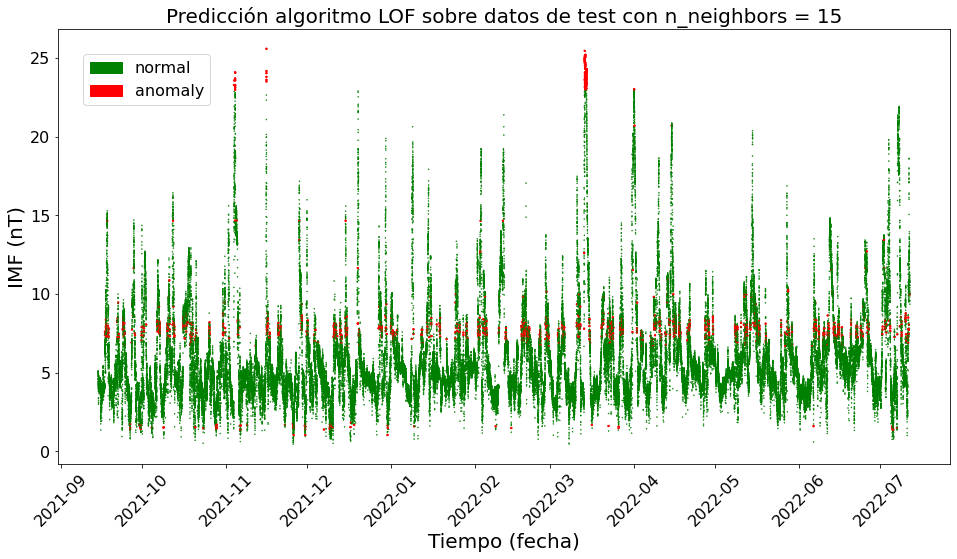

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
colors = ['green']*len(X_test['LOF label20'])
sizes = [0.1]*len(X_test['LOF label20'])
for index, outlier_value in enumerate(X_test['LOF label15']):
    if outlier_value == 1:
        colors[index] = 'red'
        sizes[index] *= 15

ax.set_title('Predicción algoritmo LOF sobre datos de test con n_neighbors = 15', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

ax.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = sizes)

legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='red', label='anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 16)

plt.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = sizes)
plt.show()

#### SUOD

In [ ]:
%%capture
!pip install suod

In [ ]:
from pyod.models.suod import SUOD
import time

In [ ]:
train_data.shape

(432576, 1)

In [ ]:
my_ecod = ECOD(contamination = 0.01)
my_vae = VAE(encoder_neurons = [64, 16, 4, 1], decoder_neurons = [1, 4, 16, 64],
          contamination = 0.01, random_state = 42, epochs = 5, preprocessing = True, verbose = 2,
          validation_size = 0.1, latent_dim = 1, dropout_rate = 0, batch_size = 512, l2_regularizer = 0)
my_iforest = IForest(contamination = 0.01, random_state = 42, n_jobs = 1, bootstrap = False, max_samples = 8192, n_estimators = 300)

detector_list = [my_ecod, my_iforest, my_vae]

# decide the number of parallel process, and the combination method
# then clf can be used as any outlier detection model
suod = SUOD(base_estimators=detector_list, n_jobs=1, combination='average',
           verbose=True, contamination = 0.01)

In [ ]:
inicio = time.time()
suod.fit(train_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')

Worker 1 sum of ranks: 5.0

Split among workers BPS: [0, 3, 3] [3, 0]
Parallel Training...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 1)            2           ['input_3[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 64)           128         ['dense_13[0][0]']               
                                                                                                  
 dropout_8 (Dropout)            (None, 64)           0           ['dense_14[0][0]']               
                                                                                            

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [ ]:
inicio = time.time()
X_test['SUOD label'] = suod.predict(test_data)
final = time.time()

print(f'Tiempo de entrenamiento: {final-inicio} segundos')
X_test['SUOD score'] = suod.decision_function(test_data)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Worker 1 sum of ranks: 5.0

Split among workers BPS: [0, 3, 3] [3, 0]
Parallel score prediction...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Parallel Score Prediction without Approximators Total Time: 21.577446460723877
Tiempo de entrenamiento: 21.64663004875183 segundos
Worker 1 sum of ranks: 5.0

Split among workers BPS: [0, 3, 3] [3, 0]
Parallel score prediction...
Parallel Score Prediction without Approximators Total Time: 25.621365547180176


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.6s finished


In [ ]:
suod.threshold_

3.6623403887029604

In [ ]:
mask = X_test['SUOD score'] >= 3.63
X_test2 = X_test[mask]
X_test3 = X_test2[X_test2['SUOD score'] <= 3.7]
X_test3[X_test3['Magnitud'] < 5]

,Fecha,Magnitud,Minutos,VAE label,VAE score,VAE outlier probability,ecod score,ecod label,isolation forest label,isolation forest score,SUOD label,SUOD score,SUOD outlier probability
7280,2021-10-04 19:44:00,0.880,1759424,0,1.931772,0.480803,6.599427,1,1,0.022011,0,3.648163,0.480803
26009,2021-11-25 20:20:00,0.876,1834340,0,1.933736,0.482932,6.625581,1,1,0.023232,1,3.668164,0.482932
26018,2021-11-25 20:56:00,0.872,1834376,0,1.935701,0.484075,6.639626,1,1,0.024653,1,3.685811,0.484075
33636,2021-12-17 00:48:00,0.864,1864848,0,1.939630,0.486886,6.674162,1,1,0.024358,1,3.696738,0.486886


In [ ]:
X_test['SUOD outlier probability'] = model.predict_proba(test_data)[:,1]

In [ ]:
outliers = X_test[X_test['SUOD label'] == 1]
np.mean(outliers['SUOD outlier probability'])

0.394098900542789

In [ ]:
np.mean(X_test['SUOD outlier probability'])

0.09174964579541127

In [ ]:
X_test

,Fecha,Magnitud,Minutos,VAE label,VAE score,VAE outlier probability,ecod score,ecod label,isolation forest label,isolation forest score,SUOD label,SUOD score,SUOD outlier probability
0,2021-09-14 14:24:00,5.069,1730304,0,0.125670,0.032458,1.091734,0,0,-0.162643,0,-0.624628,0.032458
1,2021-09-14 14:28:00,5.088,1730308,0,0.135001,0.033271,1.101713,0,0,-0.162451,0,-0.615149,0.033271
2,2021-09-14 14:32:00,5.118,1730312,0,0.149736,0.034525,1.117119,0,0,-0.156643,0,-0.553771,0.034525
3,2021-09-14 14:36:00,5.071,1730316,0,0.126652,0.032548,1.092831,0,0,-0.162028,0,-0.618583,0.032548
4,2021-09-14 14:40:00,5.025,1730320,0,0.104059,0.030578,1.068629,0,0,-0.159662,0,-0.617602,0.030578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108139,2022-07-11 23:40:00,10.000,2162860,0,2.547547,0.213786,3.319262,0,0,-0.049740,0,2.246499,0.213786
108140,2022-07-11 23:44:00,9.816,2162864,0,2.457174,0.208191,3.250524,0,0,-0.054122,0,2.142731,0.208191
108141,2022-07-11 23:48:00,9.576,2162868,0,2.339298,0.200707,3.158582,0,0,-0.055991,0,2.039134,0.200707
108142,2022-07-11 23:52:00,9.566,2162872,0,2.334386,0.200427,3.155149,0,0,-0.055966,0,2.035825,0.200427


In [ ]:
path = '/content/drive/MyDrive/TFM/TFM/test_with_suod.xlsx'
X_test.to_excel(path)

In [ ]:
X_test.value_counts(subset = 'SUOD label')

SUOD label
0    103903
1      4241
dtype: int64

In [ ]:
4241/len(X_test)

0.03921623021156976

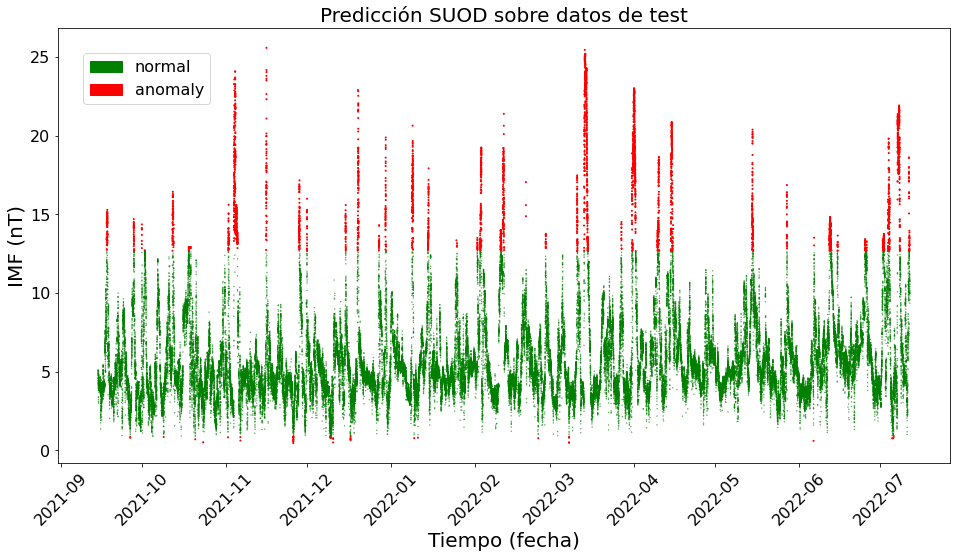

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
colors = ['green']*len(X_test['SUOD label'])
sizes = [0.1]*len(X_test['SUOD label'])

for index, outlier_value in enumerate(X_test['SUOD label']):
    if outlier_value == 1:
        colors[index] = 'red'
        sizes[index] *= 10

ax.set_title('Predicción SUOD sobre datos de test', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

ax.scatter(X_test['Fecha'], X_test['Magnitud'], c=colors, s = sizes)

legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='red', label='anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 16)
plt.show()

## 4. Stream machine learning

### imports

In [ ]:
%%capture
!pip install pyod

In [ ]:
%%capture
!pip install pysad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [ ]:
from pyod.models.iforest import IForest
from sklearn.utils import shuffle
from pysad.models.integrations import ReferenceWindowModel
from pysad.utils import PandasStreamer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### SML

In [ ]:
path_AC_H1_MFI_train = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI_train.xlsx'
path_AC_H1_MFI_test = '/content/drive/MyDrive/TFM/TFM/AC_H1_MFI_test.xlsx'
X_train = pd.read_excel(path_AC_H1_MFI_train)
X_test = pd.read_excel(path_AC_H1_MFI_test)
display(X_train.shape)
display(X_test.shape)

(432576, 3)

(108144, 3)

In [ ]:
train_data = X_train[['Magnitud']]
test_data = X_test[['Magnitud']]

(432576, 1)

In [ ]:
my_iforest = IForest(contamination = 0.01, random_state = 42)
iterator = PandasStreamer(shuffle=False)

# Fit reference window integration to first 100 instances initially.
model = ReferenceWindowModel(model_cls = IForest, window_size = 20000, sliding_size = 5000, initial_window_X = test_data[30000:50000])

anomaly_scores = []
counter = 50000
for X in iterator.iter(test_data[50000:], y = None):

    counter += 1
    anomaly_score = model.fit_score_partial(X)  # Fit to the instance.
    anomaly_scores.append(anomaly_score)
    print(counter)

In [ ]:
data = np.array(test_data[50000:]).reshape(test_data[50000:].shape[0])
fecha = np.array(X_test[['Fecha']][50000:]).reshape(X_test[['Fecha']][50000:].shape[0])
data.shape
dict_data = {'IMF': data, 'Fecha': fecha, 'anomaly score': anomaly_scores}

In [ ]:
df_online_ml = pd.DataFrame(dict_data)
df_online_ml

,IMF,Fecha,anomaly score
0,5.329,2022-01-31 11:44:00,-0.145807
1,5.287,2022-01-31 11:48:00,-0.142437
2,5.264,2022-01-31 11:52:00,-0.141042
3,5.358,2022-01-31 11:56:00,-0.141354
4,5.395,2022-01-31 12:00:00,-0.138717
...,...,...,...
58139,10.000,2022-07-11 23:40:00,-0.010919
58140,9.816,2022-07-11 23:44:00,-0.013381
58141,9.576,2022-07-11 23:48:00,-0.016715
58142,9.566,2022-07-11 23:52:00,-0.015977


In [ ]:
df_online_ml.describe()

,IMF,anomaly score
count,58144.000000,58144.000000
mean,6.349014,-0.077574
std,3.312332,0.079422
min,0.482000,-0.180079
25%,4.215750,-0.126129
50%,5.510000,-0.103819
75%,7.316000,-0.054459
max,25.459999,0.241921


In [ ]:
df_online_ml['label 0.15'] = df_online_ml['anomaly score'].apply(lambda x: 1 if x > 0.15 else 0)

In [ ]:
df_online_ml.value_counts(subset = 'label 0.15')

label 0.15
0    56435
1     1709
dtype: int64

In [ ]:
1709/58144

0.02939254265272427

In [ ]:
df_online_ml.to_excel('/content/drive/MyDrive/TFM/TFM/online_ml_results2.xlsx', index = False)

### Visualización

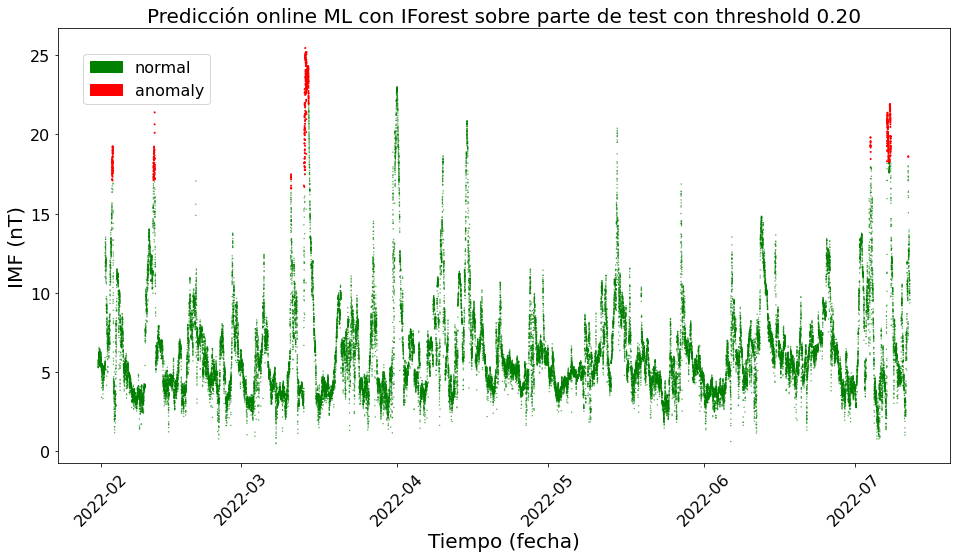

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
colors = ['green']*len(df_online_ml['label 0.2'])
sizes = [0.1]*len(df_online_ml['label 0.2'])

for index, outlier_value in enumerate(df_online_ml['label 0.2']):
    if outlier_value == 1:
        colors[index] = 'red'
        sizes[index] *= 10

ax.set_title('Predicción online ML con IForest sobre parte de test con threshold 0.20', fontsize = 20)
ax.set_xlabel('Tiempo (fecha)', fontsize = 20)
ax.set_ylabel('IMF (nT)', fontsize = 20)
plt.xticks(fontsize=16, rotation = 45)
plt.yticks(fontsize=16)

ax.scatter(df_online_ml['Fecha'], df_online_ml['IMF'], c=colors, s = sizes)

legend_elements = [Circle((0,0), color='green', label='normal', radius = 0.5),
                   Circle((0,0), color='red', label='anomaly', radius = 0.5)]
ax.legend(handles = legend_elements, loc = 'upper left', bbox_to_anchor = (0.02, 0.96), fontsize = 16)
plt.show()

## 5. Comparativa de modelos con las etiquetas

### imports

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### creación Excel etiquetas

In [ ]:
path = '/content/drive/MyDrive/TFM/TFM/test_with_suod.xlsx'
X_test = pd.read_excel(path)

In [ ]:
path_SML = '/content/drive/MyDrive/TFM/TFM/online_ml_results2.xlsx'
X_test_SML = pd.read_excel(path_SML)

In [ ]:
X_test

,Unnamed: 0,Fecha,Magnitud,Minutos,VAE label,VAE score,VAE outlier probability,ecod score,ecod label,isolation forest label,isolation forest score,SUOD label,SUOD score,SUOD outlier probability,OOL label
0,0,2021-09-14 14:24:00,5.069,1730304,0,0.125670,0.032458,1.091734,0,0,-0.162643,0,-0.624628,0.032458,0.0
1,1,2021-09-14 14:28:00,5.088,1730308,0,0.135001,0.033271,1.101713,0,0,-0.162451,0,-0.615149,0.033271,0.0
2,2,2021-09-14 14:32:00,5.118,1730312,0,0.149736,0.034525,1.117119,0,0,-0.156643,0,-0.553771,0.034525,0.0
3,3,2021-09-14 14:36:00,5.071,1730316,0,0.126652,0.032548,1.092831,0,0,-0.162028,0,-0.618583,0.032548,0.0
4,4,2021-09-14 14:40:00,5.025,1730320,0,0.104059,0.030578,1.068629,0,0,-0.159662,0,-0.617602,0.030578,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108139,108139,2022-07-11 23:40:00,10.000,2162860,0,2.547547,0.213786,3.319262,0,0,-0.049740,0,2.246499,0.213786,0.0
108140,108140,2022-07-11 23:44:00,9.816,2162864,0,2.457174,0.208191,3.250524,0,0,-0.054122,0,2.142731,0.208191,0.0
108141,108141,2022-07-11 23:48:00,9.576,2162868,0,2.339298,0.200707,3.158582,0,0,-0.055991,0,2.039134,0.200707,0.0
108142,108142,2022-07-11 23:52:00,9.566,2162872,0,2.334386,0.200427,3.155149,0,0,-0.055966,0,2.035825,0.200427,0.0


In [ ]:
X_test_SML

,IMF,Fecha,anomaly score,label 0.15,label 0.10,label 0,label 0.2
0,5.329,2022-01-31 11:44:00,-0.145807,0,0,0,0
1,5.287,2022-01-31 11:48:00,-0.142437,0,0,0,0
2,5.264,2022-01-31 11:52:00,-0.141042,0,0,0,0
3,5.358,2022-01-31 11:56:00,-0.141354,0,0,0,0
4,5.395,2022-01-31 12:00:00,-0.138717,0,0,0,0
...,...,...,...,...,...,...,...
58139,10.000,2022-07-11 23:40:00,-0.010919,0,0,0,0
58140,9.816,2022-07-11 23:44:00,-0.013381,0,0,0,0
58141,9.576,2022-07-11 23:48:00,-0.016715,0,0,0,0
58142,9.566,2022-07-11 23:52:00,-0.015977,0,0,0,0


In [ ]:
X_test_SML['OOL label'] = X_test['OOL label'].iloc[50000:]

In [ ]:
X_test_SML

,IMF,Fecha,anomaly score,label 0.15,label 0.10,label 0,label 0.2,OOL label
0,5.329,2022-01-31 11:44:00,-0.145807,0,0,0,0,0.0
1,5.287,2022-01-31 11:48:00,-0.142437,0,0,0,0,0.0
2,5.264,2022-01-31 11:52:00,-0.141042,0,0,0,0,0.0
3,5.358,2022-01-31 11:56:00,-0.141354,0,0,0,0,0.0
4,5.395,2022-01-31 12:00:00,-0.138717,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
58139,10.000,2022-07-11 23:40:00,-0.010919,0,0,0,0,0.0
58140,9.816,2022-07-11 23:44:00,-0.013381,0,0,0,0,0.0
58141,9.576,2022-07-11 23:48:00,-0.016715,0,0,0,0,0.0
58142,9.566,2022-07-11 23:52:00,-0.015977,0,0,0,0,0.0


In [ ]:
q1 = X_test['Magnitud'].quantile(0.25)
q3 = X_test['Magnitud'].quantile(0.75)
iqr = q3 - q1
print(q1, q3, iqr)

4.037000179290771 6.84499979019165 2.80799961090088


In [ ]:
top_hard_limit = q3 + 3*iqr
bot_hard_limit = q1 - 3*iqr

print(top_hard_limit, bot_hard_limit)

15.26899862289429 -4.38699865341187


In [ ]:
def assign_outlier_label(df_column, bot_hard_limit, top_hard_limit):
  store = np.zeros(len(df_column))
  for position, value in enumerate(df_column):
    if value < bot_hard_limit:
      store[position] = 1
    elif value > top_hard_limit:
      store[position] = 1

  return store

In [ ]:
X_test_SML['OOL label'] = assign_outlier_label(X_test_SML['IMF'], bot_hard_limit, top_hard_limit)

In [ ]:
X_test_SML.value_counts(subset = 'label 0.15')

label 0.15
0    56435
1     1709
dtype: int64

In [ ]:
X_test_SML.value_counts(subset = 'label 0.10')

label 0.10
0    54694
1     3450
dtype: int64

In [ ]:
X_test_SML.value_counts(subset = 'label 0')

label 0
0    50649
1     7495
dtype: int64

In [ ]:
X_test_SML.value_counts(subset = 'label 0.2')

label 0.2
0    57484
1      660
dtype: int64

In [ ]:
X_test_SML.value_counts(subset = 'OOL label')

OOL label
0.0    56530
1.0     1614
dtype: int64

In [ ]:
X_test_labels = X_test[['Fecha', 'Magnitud', 'OOL label', 'isolation forest label', 'VAE label', 'ecod label', 'SUOD label']]

In [ ]:
X_test_labels.to_excel('/content/drive/MyDrive/TFM/TFM/test_labels.xlsx', index = False)

### lectura excel y metricas

In [ ]:
X_test = pd.read_excel('/content/drive/MyDrive/TFM/TFM/test_labels.xlsx')
X_test

,Fecha,Magnitud,OOL label,isolation forest label,VAE label,ecod label,SUOD label
0,2021-09-14 14:24:00,5.069,0,0,0,0,0
1,2021-09-14 14:28:00,5.088,0,0,0,0,0
2,2021-09-14 14:32:00,5.118,0,0,0,0,0
3,2021-09-14 14:36:00,5.071,0,0,0,0,0
4,2021-09-14 14:40:00,5.025,0,0,0,0,0
...,...,...,...,...,...,...,...
108139,2022-07-11 23:40:00,10.000,0,0,0,0,0
108140,2022-07-11 23:44:00,9.816,0,0,0,0,0
108141,2022-07-11 23:48:00,9.576,0,0,0,0,0
108142,2022-07-11 23:52:00,9.566,0,0,0,0,0


#### barplots de outliers y tiempos de entrenamiento y predicción

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dict_outliers = {'Algoritmo': ['VAE', 'VAE', 'VAE', 'IForest', 'IForest', 'IForest', 'ECOD', 'ECOD', 'ECOD', 'SUOD', 'SUOD', 'SUOD'], 'Outliers': [0, 5210, 5210, 71, 4334, 4405, 180, 1922, 2102, 44, 4197, 4241], 'Tipo de outliers': ['Inferiores', 'Superiores', 'Totales']*4}
df_outliers = pd.DataFrame(dict_outliers)

In [ ]:
dict_tiempos = {'Algoritmo': ['VAE', 'VAE', 'VAE', 'IForest', 'IForest', 'IForest', 'ECOD', 'ECOD', 'ECOD', 'SUOD', 'SUOD', 'SUOD'], 'Tiempos': [43.74, 10.31, 54.05, 107.52, 14.16, 121.68, 0.34, 0.43, 0.77, 164.89, 21.65, 186.54], 'Tipo de tiempo': ['Entrenamiento', 'Predicción', 'Total']*4}
df_tiempos = pd.DataFrame(dict_tiempos)

In [ ]:
df_outliers

,Algoritmo,Outliers,Tipo de outliers
0,VAE,0,Inferiores
1,VAE,5210,Superiores
2,VAE,5210,Totales
3,IForest,71,Inferiores
4,IForest,4334,Superiores
5,IForest,4405,Totales
6,ECOD,180,Inferiores
7,ECOD,1922,Superiores
8,ECOD,2102,Totales
9,SUOD,44,Inferiores


In [ ]:
df_tiempos

,Algoritmo,Tiempos,Tipo de tiempo
0,VAE,43.74,Entrenamiento
1,VAE,10.31,Predicción
2,VAE,54.05,Total
3,IForest,107.52,Entrenamiento
4,IForest,14.16,Predicción
5,IForest,121.68,Total
6,ECOD,0.34,Entrenamiento
7,ECOD,0.43,Predicción
8,ECOD,0.77,Total
9,SUOD,164.89,Entrenamiento


In [ ]:
len(X_train)

432576

In [ ]:
len(X_test)

108144

Text(0.5, 1.0, 'Tiempos requeridos por cada algoritmo')

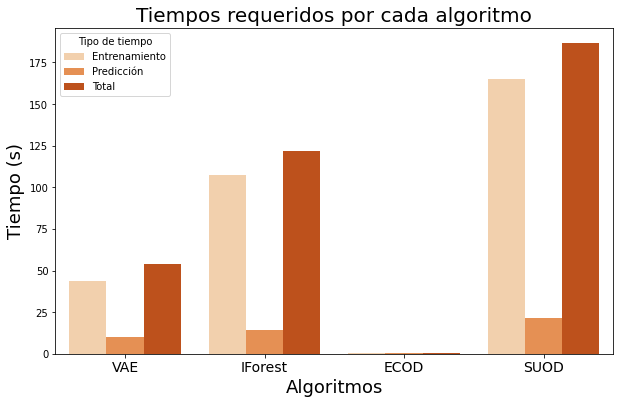

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x="Algoritmo", y="Tiempos", 
            hue="Tipo de tiempo", data=df_tiempos, 
            palette='Oranges') 
  
plt.ylabel("Tiempo (s)", size=18) 
plt.xlabel("Algoritmos", size=18) 
plt.xticks(size=14)
plt.title("Tiempos requeridos por cada algoritmo", size=20)

Text(0.5, 1.0, 'Outliers obtenidos por cada algoritmo')

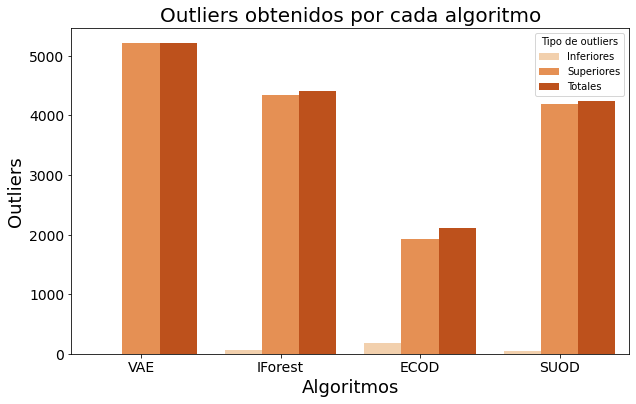

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x="Algoritmo", y="Outliers", 
            hue="Tipo de outliers", data=df_outliers, 
            palette='Oranges') 
  
plt.ylabel("Outliers", size=18) 
plt.xlabel("Algoritmos", size=18)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title("Outliers obtenidos por cada algoritmo", size=20)

#### classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(X_test_SML['OOL label'], X_test_SML['label 0.15'], digits = 3))

              precision    recall  f1-score   support

         0.0      0.993     0.991     0.992     56530
         1.0      0.719     0.761     0.739      1614

    accuracy                          0.985     58144
   macro avg      0.856     0.876     0.866     58144
weighted avg      0.986     0.985     0.985     58144



In [ ]:
print(classification_report(X_test_SML['OOL label'], X_test_SML['label 0.10'], digits = 3))

              precision    recall  f1-score   support

         0.0      0.999     0.967     0.983     56530
         1.0      0.452     0.966     0.616      1614

    accuracy                          0.967     58144
   macro avg      0.725     0.966     0.799     58144
weighted avg      0.984     0.967     0.972     58144



In [ ]:
print(classification_report(X_test_SML['OOL label'], X_test_SML['label 0'], digits = 3))

              precision    recall  f1-score   support

         0.0      1.000     0.896     0.945     56530
         1.0      0.215     1.000     0.354      1614

    accuracy                          0.899     58144
   macro avg      0.608     0.948     0.650     58144
weighted avg      0.978     0.899     0.929     58144



In [ ]:
print(classification_report(X_test_SML['OOL label'], X_test_SML['label 0.2'], digits = 3))

              precision    recall  f1-score   support

         0.0      0.983     1.000     0.992     56530
         1.0      1.000     0.409     0.580      1614

    accuracy                          0.984     58144
   macro avg      0.992     0.704     0.786     58144
weighted avg      0.984     0.984     0.980     58144



#### otras

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(X_test['OOL label'], X_test['SUOD label']))

0.9806646693297825


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(X_test['OOL label'], X_test['SUOD label']))

[[103903   2091]
 [     0   2150]]


In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(X_test['OOL label'], X_test['SUOD label'])

In [ ]:
precision

array([0.50695591, 1.        ])

In [ ]:
recall

array([1., 0.])

In [ ]:
thresholds

array([1])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

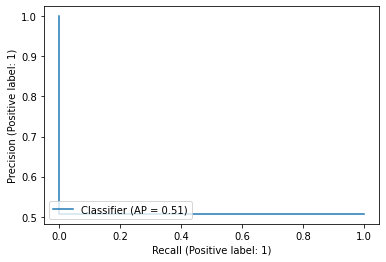

In [ ]:
PrecisionRecallDisplay.from_predictions(X_test['OOL label'], X_test['SUOD label'])

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(X_test['OOL label'], X_test['ecod label'])

0.9461276395197447

In [ ]:
from sklearn.metrics import RocCurveDisplay

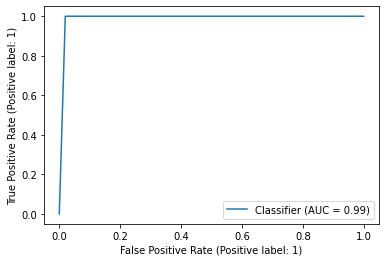

In [ ]:
RocCurveDisplay.from_predictions(X_test['OOL label'], X_test['SUOD label'])

#### matrices de confusión

In [ ]:
import seaborn as sns

In [ ]:
matrix_suod = confusion_matrix(X_test['OOL label'], X_test['SUOD label'])

In [ ]:
tp = matrix_suod[1,1]
tn = matrix_suod[0,0]/1000
fp = matrix_suod[0,1]
fn = matrix_suod[1,0]

In [ ]:
array_suod = np.array([[tp, fp], [fn, tn]])

In [ ]:
print(tp, tn, fp, fn)

2150 103.903 2091 0


In [ ]:
group_names = ['TP','FP', 'FN', 'TN']
group_counts = [tp, fp, fn, tn]
group_perc = ['{0:.2%}'.format(value/len(X_test)) for value in group_counts]
categories = ['outlier', 'normal']
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_perc)]
labels = np.asarray(labels).reshape(2,2)

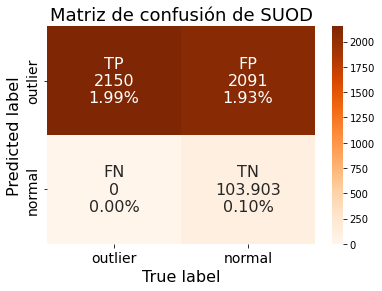

In [ ]:
sns.heatmap(array_suod, annot = labels, cmap = 'Oranges', fmt = '', xticklabels = categories, 
            yticklabels = categories, annot_kws = {'size': 16})
plt.title('Matriz de confusión de SUOD', size = 18)
plt.ylabel('Predicted label', size = 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel('True label', size = 16)# + stats_text)
plt.show()

In [ ]:
matrix_iforest = confusion_matrix(X_test['OOL label'], X_test['isolation forest label'])

In [ ]:
tp = matrix_iforest[1,1]
tn = matrix_iforest[0,0]/1000
fp = matrix_iforest[0,1]
fn = matrix_iforest[1,0]

In [ ]:
array_iforest = np.array([[tp, fp], [fn, tn]])

In [ ]:
print(tp, tn, fp, fn)

2150 103.739 2255 0


In [ ]:
group_names = ['TP','FP', 'FN', 'TN']
group_counts = [tp, fp, fn, tn]
group_perc = ['{0:.2%}'.format(value/len(X_test)) for value in group_counts]
categories = ['outlier', 'normal']
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_perc)]
labels = np.asarray(labels).reshape(2,2)

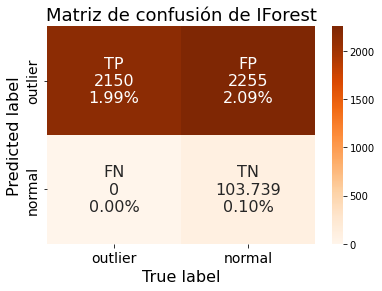

In [ ]:
sns.heatmap(array_iforest, annot = labels, cmap = 'Oranges', fmt = '', xticklabels = categories, 
            yticklabels = categories, annot_kws = {'size': 16})
plt.title('Matriz de confusión de IForest', size = 18)
plt.ylabel('Predicted label', size = 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel('True label', size = 16)# + stats_text)
plt.show()

In [ ]:
matrix_vae = confusion_matrix(X_test['OOL label'], X_test['VAE label'])

In [ ]:
tp = matrix_vae[1,1]
tn = matrix_vae[0,0]/1000
fp = matrix_vae[0,1]
fn = matrix_vae[1,0]

In [ ]:
array_vae = np.array([[tp, fp], [fn, tn]])

In [ ]:
print(tp, tn, fp, fn)

2150 102.934 3060 0


In [ ]:
group_names = ['TP','FP', 'FN', 'TN']
group_counts = [tp, fp, fn, tn]
group_perc = ['{0:.2%}'.format(value/len(X_test)) for value in group_counts]
categories = ['outlier', 'normal']
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_perc)]
labels = np.asarray(labels).reshape(2,2)

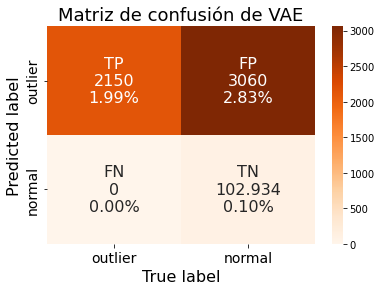

In [ ]:
sns.heatmap(array_vae, annot = labels, cmap = 'Oranges', fmt = '', xticklabels = categories, 
            yticklabels = categories, annot_kws = {'size': 16})
plt.title('Matriz de confusión de VAE', size = 18)
plt.ylabel('Predicted label', size = 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel('True label', size = 16)# + stats_text)
plt.show()

In [ ]:
matrix_ecod = confusion_matrix(X_test['OOL label'], X_test['ecod label'])

In [ ]:
tp = matrix_ecod[1,1]
tn = matrix_ecod[0,0]/1000
fp = matrix_ecod[0,1]
fn = matrix_ecod[1,0]

In [ ]:
array_ecod = np.array([[tp, fp], [fn, tn]])

In [ ]:
print(tp, tn, fp, fn)

1922 105.814 180 228


In [ ]:
group_names = ['TP','FP', 'FN', 'TN']
group_counts = [tp, fp, fn, tn]
group_perc = ['{0:.2%}'.format(value/len(X_test)) for value in group_counts]
categories = ['outlier', 'normal']
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_perc)]
labels = np.asarray(labels).reshape(2,2)

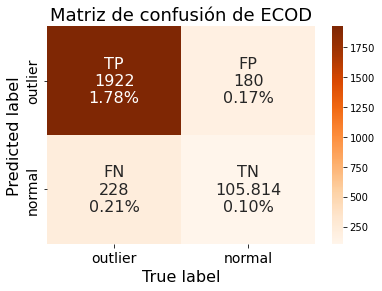

In [ ]:
sns.heatmap(array_ecod, annot = labels, cmap = 'Oranges', fmt = '', xticklabels = categories, 
            yticklabels = categories, annot_kws = {'size': 16})
plt.title('Matriz de confusión de ECOD', size = 18)
plt.ylabel('Predicted label', size = 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.xlabel('True label', size = 16)# + stats_text)
plt.show()